In [41]:
#Importing Required Libraries
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [2]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Extracting the Zip Folders
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Extracted_Dataset.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Dataset')

In [6]:
#Getting the Data
train_directory = "/content/drive/MyDrive/Dataset/Train_Dataset"
val_directory =  "/content/drive/MyDrive/Dataset/Test_Dataset"
test_directory = "/content/drive/MyDrive/Dataset/Validation_Dataset"

In [45]:
#Data_Preprocessing and displaying the images and classes
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (48, 48),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(val_directory,
                                            target_size = (48, 48),
                                            batch_size = 128,
                                            class_mode = 'categorical')

test_set = val_datagen.flow_from_directory(test_directory,
                                            target_size = (48, 48),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 31482 images belonging to 3 classes.
Found 10746 images belonging to 3 classes.
Found 4801 images belonging to 3 classes.


In [9]:
import os
folder_path = "/content/drive/MyDrive/Dataset/Train_Dataset"
folders = os.listdir(folder_path)
len(folders)

3

In [108]:
#Defining the CNN Model
Model=Sequential([
    (Conv2D(128,(3,3),activation='relu',input_shape=(48,48,3))),
    (MaxPooling2D(pool_size=(2,2))),
    (Dropout(0.25)),
    (Conv2D(64,(3,3),activation='relu')),
    (MaxPooling2D(pool_size=(2,2))),
    (Dropout(0.25)),
    (Conv2D(32,(3,3),activation='relu')),
    (MaxPooling2D(pool_size=(2,2))),
    (Dropout(0.3)),
    (Flatten()),
    (Dense(128,activation='relu')),
    (Dropout(0.5)),
    (Dense(units=len(folders),activation='softmax')),
])

In [109]:
Model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
#Training the Model
result = Model.fit(training_set,
    steps_per_epoch=len(training_set),
    validation_data=val_set,
    validation_steps=len(val_set),
    epochs=12
)

Epoch 1/12
246/246 [==============================] - 147s 588ms/step - loss: 1.0998 - accuracy: 0.3452 - val_loss: 1.0964 - val_accuracy: 0.3498
Epoch 2/12
246/246 [==============================] - 128s 521ms/step - loss: 1.0963 - accuracy: 0.3616 - val_loss: 1.0923 - val_accuracy: 0.3510
Epoch 3/12
246/246 [==============================] - 127s 518ms/step - loss: 1.0897 - accuracy: 0.3823 - val_loss: 1.0774 - val_accuracy: 0.4507
Epoch 4/12
246/246 [==============================] - 127s 517ms/step - loss: 1.0717 - accuracy: 0.4117 - val_loss: 1.0474 - val_accuracy: 0.4062
Epoch 5/12
246/246 [==============================] - 143s 583ms/step - loss: 1.0265 - accuracy: 0.4642 - val_loss: 1.0206 - val_accuracy: 0.4641
Epoch 6/12
246/246 [==============================] - 126s 514ms/step - loss: 0.9722 - accuracy: 0.5077 - val_loss: 0.9941 - val_accuracy: 0.5365
Epoch 7/12
246/246 [==============================] - 125s 509ms/step - loss: 0.9159 - accuracy: 0.5544 - val_loss: 1.0698 -

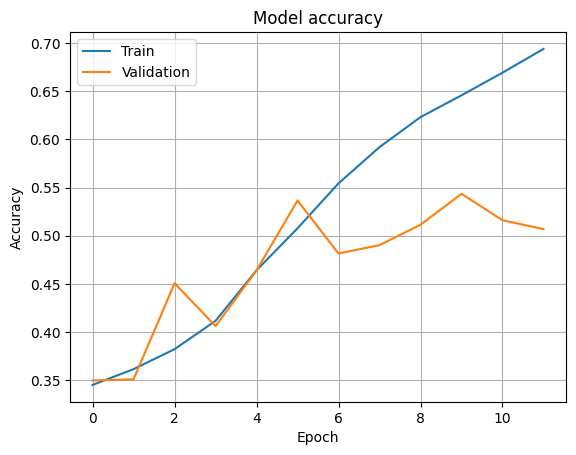

In [111]:
# Plot training & validation accuracy values
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

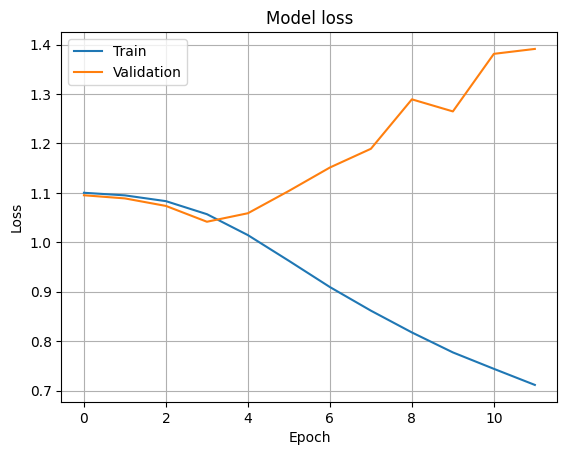

In [40]:
# Plot training & validation loss values
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [112]:
#Evaluating with Test Dataset
loss, accuracy =Model.evaluate(test_set,verbose=0)

In [113]:
print('Test accuracy:', accuracy)

Test accuracy: 0.3897104859352112


In [114]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
true_classes = test_set.classes
predicted_classes = Model.predict(test_set).argmax(axis=-1)
class_labels = list(test_set.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

38/38 [==============================] - 12s 303ms/step
[[431 264 902]
 [411 286 888]
 [429 288 902]]
